In [6]:
#Load necessary libraries
install.packages('readr')
install.packages('proxy')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [20]:
library(readr)
library(proxy)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [8]:

# Load the dataset
data <- read_csv("AfSmote_Data.csv")
head(data)

Rows: 17000 Columns: 26
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (26): Customer_Age, Dependent_count, Education_Level, Income_Category, M...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Customer_Age,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,⋯,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Attrition_Flag
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
45,3,3,2,39,5,1,3,12691,777,⋯,0,1,0,1,0,1,0,0,0,1
49,5,2,4,44,6,1,2,8256,864,⋯,1,0,0,0,1,1,0,0,0,1
51,3,2,3,36,4,1,0,3418,0,⋯,0,1,0,1,0,1,0,0,0,1
40,4,3,4,34,3,4,1,3313,2517,⋯,1,0,0,1,0,1,0,0,0,1
40,3,5,2,21,5,1,0,4716,0,⋯,0,1,0,1,0,1,0,0,0,1
44,2,2,1,36,3,1,2,4010,1247,⋯,0,1,0,1,0,1,0,0,0,1


In [9]:
# Print the structure of the data
str(data)

spc_tbl_ [17,000 × 26] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Customer_Age            : num [1:17000] 45 49 51 40 40 44 51 32 37 48 ...
 $ Dependent_count         : num [1:17000] 3 5 3 4 3 2 4 0 3 2 ...
 $ Education_Level         : num [1:17000] 3 2 2 3 5 2 2 3 5 2 ...
 $ Income_Category         : num [1:17000] 2 4 3 4 2 1 0 2 2 3 ...
 $ Months_on_book          : num [1:17000] 39 44 36 34 21 36 46 27 36 36 ...
 $ Total_Relationship_Count: num [1:17000] 5 6 4 3 5 3 6 2 5 6 ...
 $ Months_Inactive_12_mon  : num [1:17000] 1 1 1 4 1 1 1 2 2 3 ...
 $ Contacts_Count_12_mon   : num [1:17000] 3 2 0 1 0 2 3 2 0 3 ...
 $ Credit_Limit            : num [1:17000] 12691 8256 3418 3313 4716 ...
 $ Total_Revolving_Bal     : num [1:17000] 777 864 0 2517 0 ...
 $ Avg_Open_To_Buy         : num [1:17000] 11914 7392 3418 796 4716 ...
 $ Total_Amt_Chng_Q4_Q1    : num [1:17000] 1.33 1.54 2.59 1.41 2.17 ...
 $ Total_Trans_Amt         : num [1:17000] 1144 1291 1887 1171 816 ...
 $ Total_Trans_Ct          : 

Since clustering necessitates the use of unlabeled datasets, it is essential to remove the labels from our dataset.

In [10]:
# Remove the label column,
data <- data[,-ncol(data)]

In [11]:
head(data)

Customer_Age,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,⋯,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
45,3,3,2,39,5,1,3,12691,777,⋯,0.061,0,1,0,1,0,1,0,0,0
49,5,2,4,44,6,1,2,8256,864,⋯,0.105,1,0,0,0,1,1,0,0,0
51,3,2,3,36,4,1,0,3418,0,⋯,0.000,0,1,0,1,0,1,0,0,0
40,4,3,4,34,3,4,1,3313,2517,⋯,0.760,1,0,0,1,0,1,0,0,0
40,3,5,2,21,5,1,0,4716,0,⋯,0.000,0,1,0,1,0,1,0,0,0
44,2,2,1,36,3,1,2,4010,1247,⋯,0.311,0,1,0,1,0,1,0,0,0


Standardizing the data is optional for cosine similarity, as it primarily affects the angle between vectors rather than their magnitude. However, I choose to standardize:

In [12]:
data_scaled <- scale(data)
head(data_scaled,n=15)

Customer_Age,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,⋯,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
-0.1737604,0.6491790,0.5033577,-0.5000837,0.42842179,1.0259414,-1.4818047,0.4737389,0.47346441,-0.2038426,⋯,-0.60758349,-1.1565506,1.1565506,-0.3045717,1.023035,-0.880577,0.2807169,-0.1169975,-0.0534699,-0.2496664
0.3675244,2.2874249,-0.2689420,0.9991532,1.10097105,1.6870111,-1.4818047,-0.5049415,-0.01609087,-0.1062480,⋯,-0.44911538,0.9590131,-0.9590131,-0.3045717,-1.125340,1.307855,0.2807169,-0.1169975,-0.0534699,-0.2496664
0.6381668,0.6491790,-0.2689420,0.2495347,0.02489223,0.3648716,-1.4818047,-2.4623023,-0.55013111,-1.0754633,⋯,-0.82727790,-1.1565506,1.1565506,-0.3045717,1.023035,-0.880577,0.2807169,-0.1169975,-0.0534699,-0.2496664
-0.8503663,1.4683019,0.5033577,0.9991532,-0.24412747,-0.2961981,1.8000834,-1.4836219,-0.56172148,1.7480495,⋯,1.90989841,0.9590131,-0.9590131,-0.3045717,1.023035,-0.880577,0.2807169,-0.1169975,-0.0534699,-0.2496664
-0.8503663,0.6491790,2.0479570,-0.5000837,-1.99275554,1.0259414,-1.4818047,-2.4623023,-0.40685202,-1.0754633,⋯,-0.82727790,-1.1565506,1.1565506,-0.3045717,1.023035,-0.880577,0.2807169,-0.1169975,-0.0534699,-0.2496664
-0.3090816,-0.1699439,-0.2689420,-1.2497021,0.02489223,-0.2961981,-1.4818047,-0.5049415,-0.48478348,0.3233926,⋯,0.29280346,-1.1565506,1.1565506,-0.3045717,1.023035,-0.880577,0.2807169,-0.1169975,-0.0534699,-0.2496664
0.6381668,1.4683019,-0.2689420,-1.9993205,1.36999075,1.6870111,-1.4818047,0.4737389,2.88260624,1.4642399,⋯,-0.58957575,-1.1565506,1.1565506,-0.3045717,1.023035,-0.880577,-3.8823958,9.8666088,-0.0534699,-0.2496664
-1.9329358,-1.8081898,0.5033577,-0.5000837,-1.18569643,-0.9572679,-0.3878420,-0.5049415,2.28266645,0.4905374,⋯,-0.65440361,-1.1565506,1.1565506,-0.3045717,1.023035,-0.880577,-3.8823958,-0.1169975,-0.0534699,4.4378869
-1.2563299,0.6491790,2.0479570,-0.5000837,0.02489223,1.0259414,-0.3878420,-2.4623023,1.53988912,1.7480495,⋯,-0.42030300,-1.1565506,1.1565506,-0.3045717,-1.125340,1.307855,0.2807169,-0.1169975,-0.0534699,-0.2496664
0.2322032,-0.1699439,-0.2689420,0.2495347,0.02489223,1.6870111,0.7061207,0.4737389,0.35921644,0.8057567,⋯,-0.30865502,-1.1565506,1.1565506,-0.3045717,-1.125340,1.307855,0.2807169,-0.1169975,-0.0534699,-0.2496664


In [13]:
# Compute cosine similarity
cosine_similarity <- function(x) {
  # Compute the cosine similarity matrix
  sim_matrix <- as.matrix(x) %*% t(as.matrix(x)) / (sqrt(rowSums(x^2) %*% t(rowSums(x^2))))
  # Convert similarity to dissimilarity
  dist_matrix <- as.dist(1 - sim_matrix)
  return(dist_matrix)
}

dist_matrix <- cosine_similarity(data_scaled)


In [ ]:
print(dist_matrix)

                 1            2            3            4            5
2     2.226828e-01                                                    
3     1.482130e-01 2.445784e-01                                       
4     3.691437e-01 1.856423e-01 2.829377e-01                          
5     1.252775e-01 2.215635e-01 5.988763e-02 2.504277e-01             
6     3.055584e-01 6.941367e-01 2.533116e-01 6.073004e-01 3.169854e-01
                 6            7            8            9           10
2                                                                     
3                                                                     
4                                                                     
5                                                                     
6                                                                     
                11           12           13           14           15
2                                                                     
3     

In [14]:
# Perform hierarchical clustering
hc <- hclust(dist_matrix, method = "complete")


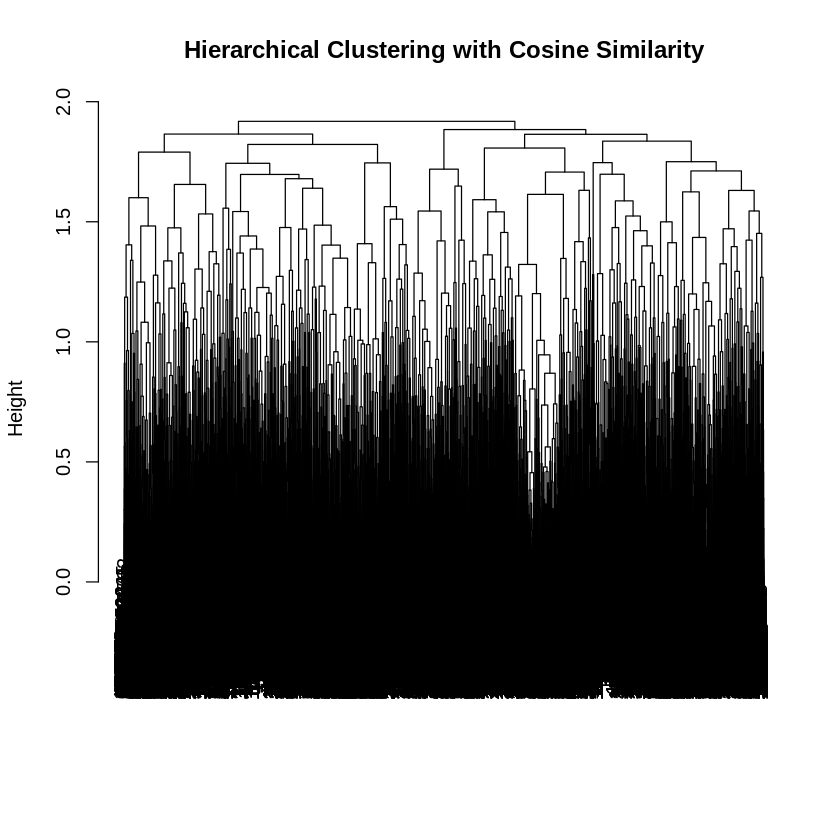

In [15]:
# Plot the dendrogram
plot(hc, main = "Hierarchical Clustering with Cosine Similarity", xlab = "", sub = "")


In [16]:
# Assign cluster labels
clusters <- cutree(hc, k = 3)

# Add cluster assignments to the original data (optional)
data$Cluster <- clusters


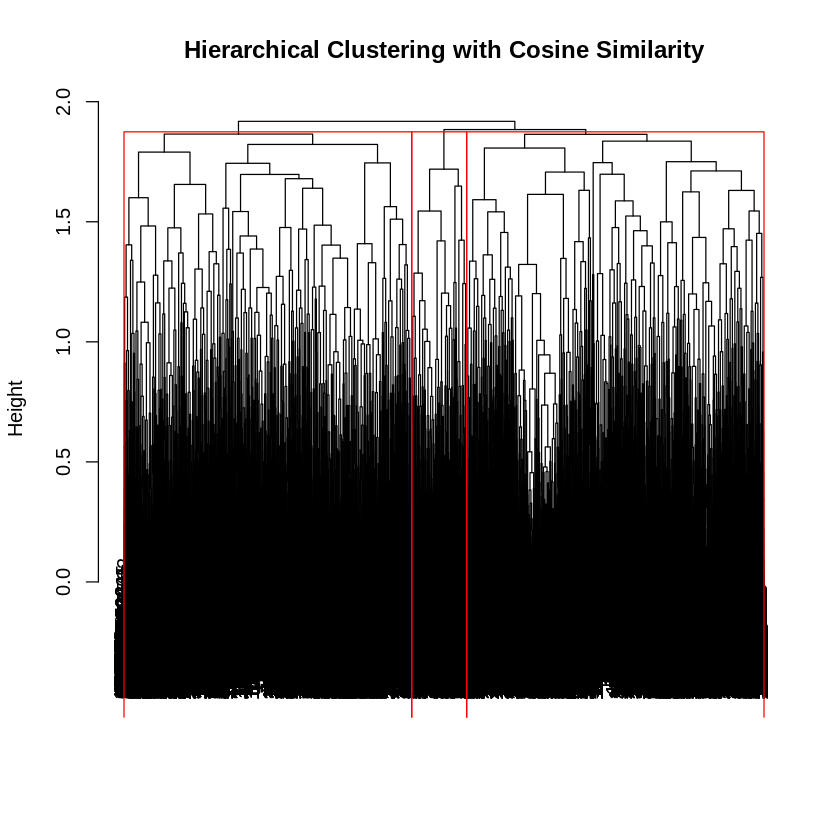

In [17]:
# Plot the dendrogram
plot(hc, main = "Hierarchical Clustering with Cosine Similarity", xlab = "", sub = "")

# Add rectangles to show the clusters; adjust k to your chosen number of clusters
rect.hclust(hc, k = 3, border = "red")


To address the issue of a large dataset with 17,000 data points, which makes it difficult to visualize and interpret the dendrogram clearly, a practical approach is to take a sample of the dataset.

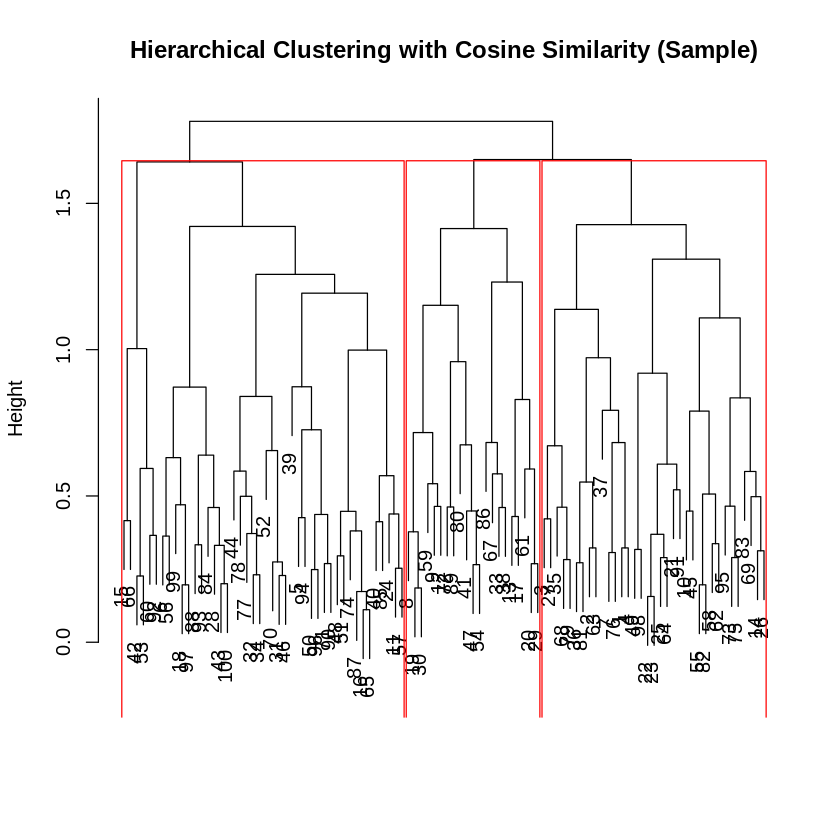

In [22]:


# Take a random sample of 100 data points
set.seed(123) # Setting seed for reproducibility
data_sample <- data %>% sample_n(100)

# Standardize the data
data_sample_scaled <- scale(data_sample)

# Compute cosine similarity and convert to dissimilarity
cosine_similarity <- function(x) {
  sim_matrix <- as.matrix(x) %*% t(as.matrix(x)) / (sqrt(rowSums(x^2) %*% t(rowSums(x^2))))
  dist_matrix <- as.dist(1 - sim_matrix)
  return(dist_matrix)
}

dist_matrix <- cosine_similarity(data_sample_scaled)

# Perform hierarchical clustering
hc_sample <- hclust(dist_matrix, method = "complete")

# Plot the dendrogram
plot(hc_sample, main = "Hierarchical Clustering with Cosine Similarity (Sample)", xlab = "", sub = "")
rect.hclust(hc_sample, k = 3, border = "red") # Visualize the cut for k=3 clusters
